# Regression
The KC housing dataset contains over 21613 houses and their characteristics. The goal is to find the best model to predict a house's price.

In [1]:
import pandas as pd

In [2]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
# Loading the dataset
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.shape

(21613, 21)

In [6]:
df.isnull().sum().sum()

0

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


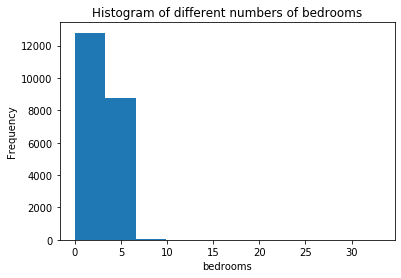

In [8]:
plt.title("Histogram of different numbers of bedrooms")
plt.xlabel("bedrooms")
df["bedrooms"].plot.hist()

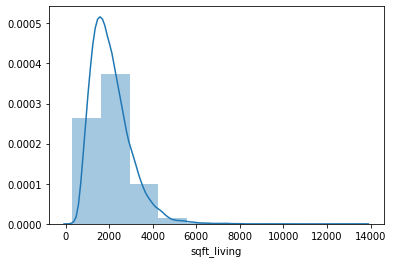

In [9]:
sns.distplot(df["sqft_living"], bins=10, hist=True, kde=True)

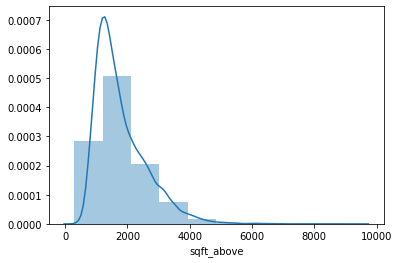

In [10]:
sns.distplot(df["sqft_above"], bins=10, hist=True, kde=True)

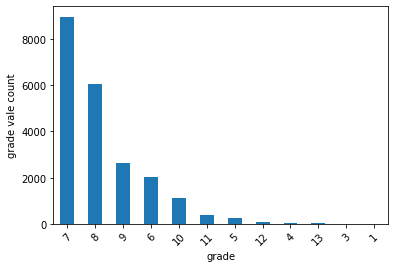

In [11]:
plt.xlabel("grade")
plt.ylabel("grade vale count")
vc = df["grade"].value_counts()
vc.plot.bar(rot=45)

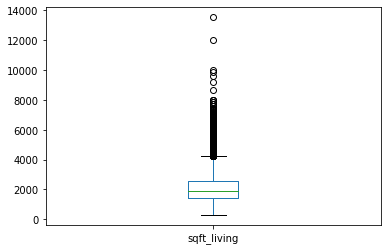

In [12]:
df["sqft_living"].plot.box()

In [13]:
df.groupby(["price"], as_index = True).mean()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,,,,,,,,,,,,,,,,,,,
75000.0,3.421079e+09,1.0,0.00,670.0,43377.0,1.0,0.0,0.0,3.0,3.0,670.0,0.0,1966.0,0.0,98022.0,47.2638,-121.906,1160.0,42882.0
78000.0,4.000036e+07,2.0,1.00,780.0,16344.0,1.0,0.0,0.0,1.0,5.0,780.0,0.0,1942.0,0.0,98168.0,47.4739,-122.280,1700.0,10387.0
80000.0,8.658300e+09,1.0,0.75,430.0,5050.0,1.0,0.0,0.0,2.0,4.0,430.0,0.0,1912.0,0.0,98014.0,47.6499,-121.909,1200.0,7500.0
81000.0,3.028200e+09,2.0,1.00,730.0,9975.0,1.0,0.0,0.0,1.0,5.0,730.0,0.0,1943.0,0.0,98168.0,47.4808,-122.315,860.0,9000.0
82000.0,3.883800e+09,3.0,1.00,860.0,10426.0,1.0,0.0,0.0,3.0,6.0,860.0,0.0,1954.0,0.0,98146.0,47.4987,-122.341,1140.0,11250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5350000.0,8.907500e+09,5.0,5.00,8000.0,23985.0,2.0,0.0,4.0,3.0,12.0,6720.0,1280.0,2009.0,0.0,98004.0,47.6232,-122.220,4600.0,21750.0
5570000.0,2.470100e+09,5.0,5.75,9200.0,35069.0,2.0,0.0,0.0,3.0,13.0,6200.0,3000.0,2001.0,0.0,98039.0,47.6289,-122.233,3560.0,24345.0
6885000.0,9.208900e+09,6.0,7.75,9890.0,31374.0,2.0,0.0,4.0,3.0,13.0,8860.0,1030.0,2001.0,0.0,98039.0,47.6305,-122.240,4540.0,42730.0


In [14]:
# By observing the data, we can know that the price is dependent on various features like bedrooms (number of bedrooms) which is the most dependent feature, bathrooms (number of bathrooms; 0.5 represents room with a toilet but no shower), sqft_living (square footage of the house's interior living space) which is the second most important feature, sqft_lot (square footage of the land space), floors (number of floors), etc.
# The other features like waterfront, view are less dependent on the price. 
# Most importantly, the necessity of dropping input variables that do not have any impact on our prediction, like Id, ZipCode and Date, is undeniably obvious.
df = df.drop(columns = ["id", "date", "zipcode"])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


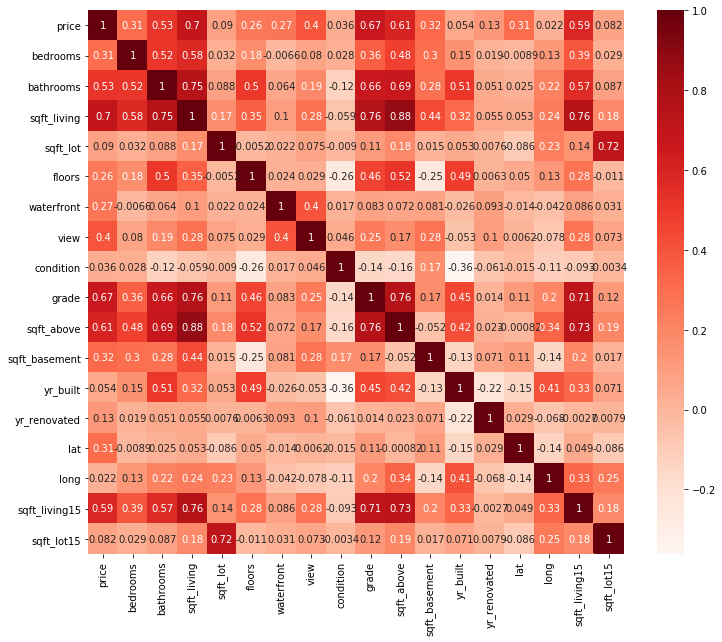

In [15]:
# Concerning the rest of the feature selection, we will use other more effective methods.
# We will first plot a correlation heatmap, in order to visualize the correlation of the features with the target variable price.
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
#Correlation with output variable
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

price            1.000000
bathrooms        0.525138
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
Name: price, dtype: float64

In [17]:
# Now that we have selected the most important features using Pearson's method (knowing that we processed numerical features only), we drop the less important ones.
df.drop(labels = ["bedrooms", "sqft_lot", "floors", "waterfront", "view", "condition", "sqft_basement", "yr_built", "yr_renovated", "lat", "long", "sqft_lot15"], axis=1).head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


In [18]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [19]:
# We split our dataset into a training set and a testing set.
y = df["price"].values
X = df[["bathrooms", "sqft_living", "grade", "sqft_above", "sqft_living15"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=40)

In [20]:
#extract x and y from our data
x=df["sqft_living"].values[:,np.newaxis]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance



In [21]:
model.coef_

array([284.00261205])

In [22]:
model.intercept_

-50697.94107634993

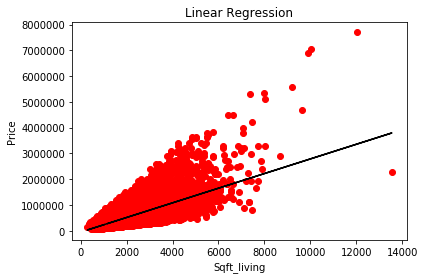

In [23]:
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [24]:
# We measure the performance of the linear regression model using the testing set
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62902408306.86502
R squared 0.4996528488387417


In [25]:
# For our multilinear regression model, we extract our new variable x2 from our data containing the values of two features
x2=df[["sqft_living","grade"]]  # indeed, we have more than one input

x2_train,x2_test,y_train,y_test=train_test_split(x2,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

lg=LinearRegression() #build linear regression model
lg.fit(x2_train,y_train) #fitting the training data
predicted_=lg.predict(x2_test) #testing our model’s performance

In [26]:
print("MSE", mean_squared_error(y_test,predicted_))
print("R squared", metrics.r2_score(y_test,predicted_))

MSE 57413775762.86427
R squared 0.5433112989852685


Let's compare the two models' performances:
According to the R squared values obtained in both models, we can conclude the multilinear regression model is more accurate than the linear regression model we developped above.

In [27]:
from sklearn.preprocessing import PolynomialFeatures 

In [28]:
poly = PolynomialFeatures(degree = 3)

x_train_fit = poly.fit_transform(X_train) #transforming our input data
model.fit(x_train_fit, y_train) # Fitting the traininf data
x_test_ = poly.fit_transform(X_test)
predicted = model.predict(x_test_)

In [29]:
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  48446088431.97141
R squared:  0.6146433342648694


Let's compare the performance of this polynomial regression model to those delivered by the two other models.
According to the R squared values obtained in all models, we can conclude that the polynomial regression model is more accurate than the multilinear regression model and the linear regression model we developped above.
So, the polynomial regression model is the best model to predict a house's price.